## Analyses scripts for the manuscript "Does climate change terminology influence willingness to take climate action?"

### Install Libraries

In [4]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
#%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# STUDY 1

### Import Study 1 data and run data preprocessing

In [5]:
# Load file (from same directory as the notebook)
df = pd.read_excel("data63.xlsx")

In [6]:
#subset control condition
df_control = df.query('cond==1')
df_control

# if you want to create an excel spreadsheet of only control data for future ease of loading large file
#file_path = 'df_control.xlsx' 

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
1,R_2ATgV5VxewrTRiI,usa,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,1.0,...,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222
17,R_1CjFxfgjU1coLqp,usa,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,100.0,100.0,100.0,100.0,100.0,...,4.0,NaN,"1,3,4,5,6,7",9.0,96.0,16.697,367.657,1,100.00,100.000000
21,R_qxty9a2HTTEq7Xb,usa,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,3.0,78.0,3.0,37.0,0.0,...,3.0,5.0,"2,3,4,5,6,7",6.0,76.0,24.055,79.902,8,30.25,66.444444
31,R_2QW2fJEzh1ev4fa,usa,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,45.0,49.0,50.0,47.0,NaN,...,3.0,1.0,"1,2,3,4,5,6,7",6.0,80.0,24.115,310.565,8,47.75,NaN
50,R_1Q0JBi1pA5p0kym,usa,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,56.0,57.0,51.0,55.0,53.0,...,2.0,4.0,"1,2,3,4,5,6,7",9.0,63.0,8.253,183.052,8,54.75,51.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59399,R_1db1dsU9anX3Iwf,vietnam,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,72.0,100.0,100.0,100.0,50.0,...,3.0,NaN,"1,2,4,5,6,7",7.0,80.0,5.195,189.709,8,93.00,82.888889
59416,R_3PFQCv3jEvnT5RD,vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,92.0,95.0,94.0,93.0,76.0,...,3.0,4.0,"1,2,3,4,5,6,7",7.0,90.0,11.888,206.495,8,93.50,79.222222
59417,R_2Qgs8q8dUPLjhcA,vietnam,1,Control,PolicySupport|SocialmediasharingPipedText|Beli...,89.0,100.0,100.0,100.0,35.0,...,3.0,NaN,NaN,NaN,NaN,6.190,166.433,2,97.25,71.111111
59433,R_3GwXA80Oate9obo,vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,100.0,100.0,100.0,100.0,100.0,...,3.0,2.0,"1,2,3,4,5,6,7",4.0,100.0,4.966,42.906,4,100.00,100.000000


In [32]:
# Load file (from same directory as the notebook)
#df_control = pd.read_excel("df_control.xlsx")
#df_control

In [7]:
#rename columns
df_control.rename(columns={
    'probe_CC_1': 'Climate_Change',
    'probe_GW_1': 'Global_Warming',
    'probe_GH_1': 'Global_Heating',
    'probe_CCrisis_1': 'Climate_Crisis',
    'probe_GE_1': 'Greenhouse_Effect',
    'probe_CE_1': 'Carbon_Emissions',
    'probe_CP_1': 'Greenhouse_Gasses',
    'probe_CEmerg_1': 'Climate_Emergency', 
    'probe_CPoll_1': 'Carbon_Pollution' 
}, inplace=True)

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_27428/4192289857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.rename(columns={


In [8]:
#remove columns that have no data for any of the 9 conditions

# List of columns to check for missing values
columns_to_check = ['Climate_Change', 'Global_Warming', 'Global_Heating', 'Climate_Crisis', 'Greenhouse_Effect', 'Carbon_Emissions', 'Greenhouse_Gasses', 'Climate_Emergency', 'Carbon_Pollution']

# Remove rows where all specified columns have missing values
df_control.dropna(subset=columns_to_check, how='all', inplace=True)

#515 rows were removed

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_27428/3554411412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.dropna(subset=columns_to_check, how='all', inplace=True)


In [9]:
#transform the dataframe from wide format to long format

df_long = pd.melt(
    df_control.loc[:, ['ResponseId', 'Climate_Change', 'Global_Warming', 'Global_Heating', 'Climate_Crisis', 'Greenhouse_Effect', 'Carbon_Emissions', 'Greenhouse_Gasses', 'Climate_Emergency', 'Carbon_Pollution', 'Politics2_1', 'Politics2_9', 'Age', 'Country', 'BELIEFcc', 'Gender', 'Income', 'MacArthur_SES', 'Edu']],
    id_vars=["ResponseId", 'Politics2_1', 'Politics2_9','Age', 'Country', 'BELIEFcc', 'Gender', 'Income', 'MacArthur_SES','Edu'],
    var_name="Term",
#    value_name="willingness"
)
df_long

,ResponseId,Politics2_1,Politics2_9,Age,Country,BELIEFcc,Gender,Income,MacArthur_SES,Edu,Term,value
0,R_2ATgV5VxewrTRiI,87.0,72.0,39.0,usa,50.25,1.0,4.0,5.0,3.0,Climate_Change,NaN
1,R_1CjFxfgjU1coLqp,3.0,5.0,50.0,usa,100.00,2.0,NaN,9.0,4.0,Climate_Change,NaN
2,R_qxty9a2HTTEq7Xb,48.0,49.0,36.0,usa,30.25,1.0,5.0,6.0,3.0,Climate_Change,NaN
3,R_2QW2fJEzh1ev4fa,NaN,NaN,51.0,usa,47.75,1.0,1.0,6.0,3.0,Climate_Change,NaN
4,R_1Q0JBi1pA5p0kym,90.0,97.0,69.0,usa,54.75,2.0,4.0,9.0,2.0,Climate_Change,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41134,R_1db1dsU9anX3Iwf,9.0,12.0,20.0,vietnam,93.00,2.0,NaN,7.0,3.0,Carbon_Pollution,NaN
41135,R_3PFQCv3jEvnT5RD,46.0,48.0,28.0,vietnam,93.50,2.0,4.0,7.0,3.0,Carbon_Pollution,NaN
41136,R_2Qgs8q8dUPLjhcA,3.0,10.0,18.0,vietnam,97.25,2.0,NaN,NaN,3.0,Carbon_Pollution,NaN
41137,R_3GwXA80Oate9obo,100.0,100.0,25.0,vietnam,100.00,2.0,2.0,4.0,3.0,Carbon_Pollution,NaN


In [10]:
df_main = df_long[['ResponseId', 'Country', 'Term', 'value']]
df_main = df_main.dropna()
df_main

,ResponseId,Country,Term,value
21,R_2DOIoot2cvjJfuC,usa,Climate_Change,51.0
33,R_vlaPuaP0mFe2zYZ,usa,Climate_Change,92.0
34,R_25t48laTwXM7U1B,usa,Climate_Change,3.0
35,R_2zIMOv7xFuxptTJ,usa,Climate_Change,80.0
41,R_3soTptaePDqmDzA,usa,Climate_Change,100.0
...,...,...,...,...
41097,R_2w4SrYTCpwOTV1a,usa,Carbon_Pollution,73.0
41112,R_2aX3rZiymHXU8jU,vietnam,Carbon_Pollution,100.0
41119,R_bx6C2qHpml7w3rr,vietnam,Carbon_Pollution,71.0
41127,R_Y5BtwTC9yOO8Rxf,vietnam,Carbon_Pollution,29.0


In [11]:
#replace "Climate_Change" with "AClimate_Change" to compare all terms with "Climate Change"
df_long['Term'] = df_long['Term'].replace(['Climate_Change'], 'AClimate_Change')
df_main['Term'] = df_main['Term'].replace(['Climate_Change'], 'AClimate_Change')

## Main manuscript analyses

In [12]:
# compute weighted mean of willingness to act, 
#accounting for differences in sample size by country

# Calculate sample sizes for each country
sample_sizes = df_main.groupby('Country').size()

# Calculate total willingness to act for each country
total_willingness = df_main.groupby('Country')['value'].sum()

# Compute the weighted mean
weighted_mean = (total_willingness / sample_sizes).mean()
weighted_mean

np.float64(73.66750975721418)

In [13]:
#unweighted mean
df_main['value'].mean()

np.float64(71.08695652173913)

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Load R in Python
%load_ext rpy2.ipython

In [15]:
# Load the R library lmerTest
%R library(lmerTest) #for linear models
%R library(car) #for ANOVAs

Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



Loading required package: carData


In [16]:
# Send R the dataset
%Rpush df_main

In [106]:
%%R
M <- lmer(value ~ as.factor(Term) + (1 | Country), data = df_main)
print(summary(M))
confint(M)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) + (1 | Country)
   Data: df_main

REML criterion at convergence: 41272.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6487 -0.5343  0.1773  0.7213  1.9975 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  61.54    7.845  
 Residual             517.41   22.747  
Number of obs: 4531, groups:  Country, 63

Fixed effects:
                                  Estimate Std. Error        df t value
(Intercept)                        74.1501     1.4209  182.6874  52.184
as.factor(Term)Carbon_Emissions    -0.6427     1.4319 4471.6914  -0.449
as.factor(Term)Carbon_Pollution     0.6663     1.3880 4474.6455   0.480
as.factor(Term)Climate_Crisis      -1.6772     1.4397 4471.9497  -1.165
as.factor(Term)Climate_Emergency   -0.2320     1.4208 4470.8019  -0.163
as.factor(Term)Global_Heating      -1.3738     1.4191 4473.8234  -0.968
as.fact

Computing profile confidence intervals ...


In [18]:
%%R
# ANOVA with type III sum of squares
anova_result <- car::Anova(M, type = "III")
print(anova_result)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: value
                    Chisq Df Pr(>Chisq)    
(Intercept)     2723.1848  1     <2e-16 ***
as.factor(Term)    8.3475  8     0.4003    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### US only

In [19]:
#USA only
countries = ["usa"]
df_main_US = df_main[df_main['Country'].isin(countries)]

In [20]:
len(df_main_US.ResponseId.unique())

606

In [21]:
# Send R the dataset
%Rpush df_main_US

In [22]:
%%R
M <- lm(value ~ as.factor(Term), data = df_main_US)
print(summary(M))
confint(M)


Call:
lm(formula = value ~ as.factor(Term), data = df_main_US)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.475 -15.781   6.392  20.736  36.256 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        63.744      3.035  21.006   <2e-16 ***
as.factor(Term)Carbon_Emissions     4.037      4.583   0.881    0.379    
as.factor(Term)Carbon_Pollution     4.864      4.406   1.104    0.270    
as.factor(Term)Climate_Crisis       3.473      4.489   0.774    0.439    
as.factor(Term)Climate_Emergency    1.685      4.472   0.377    0.706    
as.factor(Term)Global_Heating       5.731      4.691   1.222    0.222    
as.factor(Term)Global_Warming       5.660      4.739   1.194    0.233    
as.factor(Term)Greenhouse_Effect    2.793      4.525   0.617    0.537    
as.factor(Term)Greenhouse_Gasses    5.131      4.583   1.120    0.263    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard e

In [23]:
%%R
# ANOVA with type III sum of squares
anova_result <- car::Anova(M, type = "III")
print(anova_result)

Anova Table (Type III tests)

Response: value
                Sum Sq  Df  F value Pr(>F)    
(Intercept)     333189   1 441.2574 <2e-16 ***
as.factor(Term)   2153   8   0.3564 0.9429    
Residuals       450789 597                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Anglosphere only

In [24]:
#majority English-speaking countries (i.e., the “core Anglosphere”): US, UK, Canada, Australia, & New Zealand
countries1 = ["usa", "uk", "canada", "australia", "newzealand"]
df_main_anglo = df_main[df_main['Country'].isin(countries1)]

In [25]:
len(df_main_anglo.ResponseId.unique())

972

In [26]:
# Send R the dataset
%Rpush df_main_anglo

In [27]:
%%R
M <- lmer(value ~ as.factor(Term) + (1 | Country), data = df_main_anglo)
print(summary(M))
confint(M)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) + (1 | Country)
   Data: df_main_anglo

REML criterion at convergence: 9013

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7132 -0.5291  0.1992  0.7281  1.3377 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)   5.13    2.265  
 Residual             648.58   25.467  
Number of obs: 972, groups:  Country, 5

Fixed effects:
                                 Estimate Std. Error       df t value Pr(>|t|)
(Intercept)                       67.2346     2.5892  34.0952  25.967   <2e-16
as.factor(Term)Carbon_Emissions    1.3353     3.4061 961.3206   0.392    0.695
as.factor(Term)Carbon_Pollution    3.0744     3.3049 960.0122   0.930    0.352
as.factor(Term)Climate_Crisis      1.9860     3.3870 960.4100   0.586    0.558
as.factor(Term)Climate_Emergency   0.7141     3.3871 960.5751   0.211    0.833
as.factor(Term)Global_Heating      4

Computing profile confidence intervals ...


In [28]:
%%R
# ANOVA with type III sum of squares
anova_result <- car::Anova(M, type = "III")
print(anova_result)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: value
                  Chisq Df Pr(>Chisq)    
(Intercept)     674.305  1     <2e-16 ***
as.factor(Term)   2.236  8     0.9729    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Here is where main analysis ends and interactions begin

### Prepare data

In [29]:
#remove missing data in df_long
dfc = df_long.dropna()
dfc

,ResponseId,Politics2_1,Politics2_9,Age,Country,BELIEFcc,Gender,Income,MacArthur_SES,Edu,Term,value
33,R_vlaPuaP0mFe2zYZ,63.0,68.0,23.0,usa,85.50,2.0,4.0,8.0,2.0,AClimate_Change,92.0
34,R_25t48laTwXM7U1B,56.0,51.0,46.0,usa,17.25,2.0,4.0,4.0,2.0,AClimate_Change,3.0
35,R_2zIMOv7xFuxptTJ,5.0,5.0,66.0,usa,100.00,2.0,5.0,4.0,3.0,AClimate_Change,80.0
41,R_3soTptaePDqmDzA,86.0,84.0,33.0,usa,96.00,1.0,6.0,7.0,3.0,AClimate_Change,100.0
46,R_3MrtwBn3BB8oduS,14.0,18.0,36.0,usa,100.00,2.0,5.0,5.0,3.0,AClimate_Change,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41090,R_3dYYWpWuniLwsXK,50.0,76.0,22.0,usa,87.75,1.0,4.0,2.0,2.0,Carbon_Pollution,100.0
41097,R_2w4SrYTCpwOTV1a,98.0,97.0,68.0,usa,61.50,1.0,6.0,7.0,3.0,Carbon_Pollution,73.0
41119,R_bx6C2qHpml7w3rr,20.0,50.0,27.0,vietnam,64.00,1.0,4.0,7.0,4.0,Carbon_Pollution,71.0
41127,R_Y5BtwTC9yOO8Rxf,52.0,48.0,19.0,vietnam,68.00,2.0,1.0,4.0,2.0,Carbon_Pollution,29.0


In [31]:
# Global median split
# dfc["Ideology"] = (dfc["Politics2_1"] > dfc["Politics2_1"].median()).astype(int)

dfc['ide'] = (dfc['Politics2_1'] + dfc['Politics2_9'])/2

# Per-country median split
new = []
for _, sub in dfc.groupby("Country"):
    sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)
    # Ensure NaN ideology when Politics2_1 is NaN
    sub.loc[sub.Politics2_1.isna(), "Ideology"] = np.nan
    new.append(sub)
dfc = pd.concat(new)
# Replace 1 with "Conservative" and 0 with "Liberal"
#dfc['Ideology'] = dfc['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')
#dfc

In [32]:
#generate median splits
dfc["Age_ms"] = (dfc["Age"] > dfc["Age"].median()).astype(float) #1 is older, 0 is younger
#dfc["SES"] = (dfc["MacArthur_SES"] > dfc["MacArthur_SES"].median()).astype(float)
dfc['Edu_binary'] = dfc['Edu'].replace(1, 0).replace(2, 0).replace(3, 1).replace(4, 1)

dfc

,ResponseId,Politics2_1,Politics2_9,Age,Country,BELIEFcc,Gender,Income,MacArthur_SES,Edu,Term,value,ide,Ideology,Age_ms,SES,Edu_binary
373,R_3ndh8CRntlGPnch,49.0,51.0,23.0,algeria,30.00,1.0,4.0,7.0,2.0,AClimate_Change,50.0,50.0,0.0,0.0,1.0,0.0
385,R_2YxMioi35u8YiGf,100.0,20.0,27.0,algeria,97.75,1.0,1.0,2.0,3.0,AClimate_Change,100.0,60.0,1.0,0.0,0.0,1.0
405,R_33s8DN04zo5c4UB,97.0,55.0,37.0,algeria,93.50,1.0,3.0,6.0,2.0,AClimate_Change,81.0,76.0,1.0,0.0,0.0,0.0
407,R_2TN3lwxFLoHz311,71.0,40.0,22.0,algeria,44.75,2.0,2.0,5.0,3.0,AClimate_Change,89.0,55.5,1.0,0.0,0.0,1.0
4951,R_3JfTS0qYxKrbfpW,50.0,48.0,37.0,algeria,100.00,1.0,8.0,7.0,4.0,Global_Warming,100.0,49.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,R_BXjEKlfDv44ckeJ,33.0,25.0,24.0,vietnam,53.00,2.0,1.0,4.0,3.0,Greenhouse_Gasses,46.0,29.0,0.0,0.0,0.0,1.0
36567,R_3j0DcbTReKZgR9O,52.0,53.0,18.0,vietnam,100.00,2.0,5.0,6.0,3.0,Climate_Emergency,88.0,52.5,1.0,0.0,0.0,1.0
41119,R_bx6C2qHpml7w3rr,20.0,50.0,27.0,vietnam,64.00,1.0,4.0,7.0,4.0,Carbon_Pollution,71.0,35.0,0.0,0.0,1.0,1.0
41127,R_Y5BtwTC9yOO8Rxf,52.0,48.0,19.0,vietnam,68.00,2.0,1.0,4.0,2.0,Carbon_Pollution,29.0,50.0,0.0,0.0,0.0,0.0


In [33]:
#remove participants whose Gender is not 1 or 2
dfc = dfc[(dfc["Gender"] == 1) | (dfc["Gender"] == 2)]

In [34]:
len(dfc.ResponseId.unique())

3354

### Run interactions using median split variables

In [35]:
# Send R the dataset
%Rpush dfc

In [105]:
%%R
#continuous ideology variable
M_ideC <- lmer(value ~ as.factor(Term)*ide + (1 | Country), data = dfc)
print(summary(M_ideC))
confint(M_ideC)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_ideC, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * ide + (1 | Country)
   Data: dfc

REML criterion at convergence: 30517.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7262 -0.5231  0.1863  0.7143  1.9644 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  56.05    7.487  
 Residual             507.84   22.535  
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                            82.36598    2.96326 1777.00637  27.796
as.factor(Term)Carbon_Emissions        -6.11541    3.94858 3296.09196  -1.549
as.factor(Term)Carbon_Pollution        -5.31743    3.88395 3296.85684  -1.369
as.factor(Term)Climate_Crisis          -6.47431    3.99899 3293.82959  -1.619
as.factor(Term)Climate_Emergency       -2.93083    4.10618 3293.35425  -0.714
as.factor(Term)Global_Heating          -6


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_ideC), correlation=TRUE)  or
    vcov(summary(M_ideC))        if you need it

Computing profile confidence intervals ...


In [48]:
%%R
#median-split ideology variable
M_ideMS <- lmer(value ~ as.factor(Term)*Ideology + (1 | Country), data = dfc)
print(summary(M_ideMS))
confint(M_ideMS)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_ideMS, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * Ideology + (1 | Country)
   Data: dfc

REML criterion at convergence: 30462.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6440 -0.5196  0.1918  0.7037  1.9477 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  53.38    7.306  
 Residual             510.53   22.595  
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                            Estimate Std. Error         df
(Intercept)                                 75.14684    1.81377  454.84919
as.factor(Term)Carbon_Emissions             -0.42177    2.25831 3292.90293
as.factor(Term)Carbon_Pollution              0.53451    2.17920 3302.11677
as.factor(Term)Climate_Crisis               -1.91965    2.29835 3294.17980
as.factor(Term)Climate_Emergency             0.07747    2.30129 3297.57993
as.factor(Term)Global_Heating               -0.57383  


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_ideMS), correlation=TRUE)  or
    vcov(summary(M_ideMS))        if you need it

Computing profile confidence intervals ...


In [50]:
%%R
M_SES <- lmer(value ~ as.factor(Term)*SES + (1 | Country), data = dfc)
print(summary(M_SES))
confint(M_SES)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_SES, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * SES + (1 | Country)
   Data: dfc

REML criterion at convergence: 30409.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5394 -0.5124  0.1828  0.6873  1.9846 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  55.81    7.471  
 Residual             502.12   22.408  
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                            72.85986    1.70353  341.49602  42.770
as.factor(Term)Carbon_Emissions        -1.27304    2.04521 3291.99917  -0.622
as.factor(Term)Carbon_Pollution         0.16040    2.00558 3298.21831   0.080
as.factor(Term)Climate_Crisis          -1.61256    2.02892 3294.90680  -0.795
as.factor(Term)Climate_Emergency        1.13857    2.04496 3297.11483   0.557
as.factor(Term)Global_Heating          -2


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_SES), correlation=TRUE)  or
    vcov(summary(M_SES))        if you need it

Computing profile confidence intervals ...


In [52]:
%%R
M_gender <- lmer(value ~ as.factor(Term)*Gender + (1 | Country), data = dfc)
print(summary(M_gender))
confint(M_gender)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_gender, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * Gender + (1 | Country)
   Data: dfc

REML criterion at convergence: 30441.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7938 -0.5030  0.1770  0.7071  2.0024 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  55.47    7.448  
 Residual             506.95   22.516  
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                          Estimate Std. Error         df
(Intercept)                               66.92151    3.67791 2540.29991
as.factor(Term)Carbon_Emissions            6.25606    5.09947 3297.76669
as.factor(Term)Carbon_Pollution            3.41718    5.05066 3299.83695
as.factor(Term)Climate_Crisis             -0.06142    5.22773 3298.20476
as.factor(Term)Climate_Emergency           0.04975    5.19589 3297.83672
as.factor(Term)Global_Heating              2.68808    5.29233 3303.1


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_gender), correlation=TRUE)  or
    vcov(summary(M_gender))        if you need it

Computing profile confidence intervals ...


In [54]:
%%R
M_age <- lmer(value ~ as.factor(Term)*Age_ms + (1 | Country), data = dfc)
print(summary(M_age))
confint(M_age)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_age, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * Age_ms + (1 | Country)
   Data: dfc

REML criterion at convergence: 30450.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6046 -0.5113  0.1879  0.6988  1.9481 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  52.86    7.27   
 Residual             508.78   22.56   
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                         Estimate Std. Error        df t value
(Intercept)                               76.8229     1.8152  470.0476  42.322
as.factor(Term)Carbon_Emissions           -2.7849     2.2487 3290.8146  -1.238
as.factor(Term)Carbon_Pollution           -0.3006     2.2209 3299.8422  -0.135
as.factor(Term)Climate_Crisis             -2.2201     2.2808 3295.1638  -0.973
as.factor(Term)Climate_Emergency          -4.0199     2.2898 3295.3880  -1.756
as.factor(Term)Global_Heating   


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_age), correlation=TRUE)  or
    vcov(summary(M_age))        if you need it

Computing profile confidence intervals ...


In [56]:
%%R
M_edu <- lmer(value ~ as.factor(Term)*Edu_binary + (1 | Country), data = dfc)
print(summary(M_edu))
confint(M_edu)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_edu, type = "III")
print(anova_result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ as.factor(Term) * Edu_binary + (1 | Country)
   Data: dfc

REML criterion at convergence: 30440.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6575 -0.5004  0.1799  0.7025  2.0783 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept)  52.41    7.239  
 Residual             507.60   22.530  
Number of obs: 3354, groups:  Country, 60

Fixed effects:
                                            Estimate Std. Error       df
(Intercept)                                   69.410      2.367 1116.826
as.factor(Term)Carbon_Emissions                3.821      3.176 3296.676
as.factor(Term)Carbon_Pollution                2.793      3.203 3294.086
as.factor(Term)Climate_Crisis                  1.410      3.224 3295.366
as.factor(Term)Climate_Emergency               3.261      3.099 3294.428
as.factor(Term)Global_Heating                 -2.947      3.334 


Correlation matrix not shown by default, as p = 18 > 12.
Use print(summary(M_edu), correlation=TRUE)  or
    vcov(summary(M_edu))        if you need it

Computing profile confidence intervals ...


# STUDY 2

### Import Study 2 data and run data preprocessing

In [58]:
# Load file (from same directory as the notebook)
df2 = pd.read_excel("TermsFollowup.xlsx")

In [60]:
# Keep only the rows where 'attentioncheck' equals 2
df2 = df2[df2['attentioncheck'] == 2]
df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,2.0,92.0,93.0,1.0,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses


In [61]:
#remove columns that have missing data for any of the 10 conditions
# List of columns to check for missing values
act_cols = ['Act_1', 'Act_1.1', 'Act_1.2', 'Act_1.3', 'Act_1.4', 'Act_1.5', 'Act_1.6', 'Act_1.7', 'Act_1.8','Act_1.9']
adv_cols = ['Advocacy_1', 'Advocacy_1.1', 'Advocacy_1.2', 'Advocacy_1.3', 'Advocacy_1.4', 'Advocacy_1.5', 'Advocacy_1.6', 'Advocacy_1.7', 'Advocacy_1.8','Advocacy_1.9']
policy_cols = ['Policy_1', 'Policy_1.1', 'Policy_1.2', 'Policy_1.3', 'Policy_1.4', 'Policy_1.5', 'Policy_1.6', 'Policy_1.7', 'Policy_1.8','Policy_1.9']
concern_cols = ['Concern_1', 'Concern_1.1', 'Concern_1.2', 'Concern_1.3', 'Concern_1.4', 'Concern_1.5', 'Concern_1.6', 'Concern_1.7', 'Concern_1.8', 'Concern_1.9']

# Remove rows where all specified columns have missing values
df2.dropna(subset=act_cols, how='all', inplace=True)
df2.dropna(subset=policy_cols, how='all', inplace=True)
df2.dropna(subset=concern_cols, how='all', inplace=True)

df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,2.0,92.0,93.0,1.0,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,R_3ff6OA9rAJMOxVd,2,51.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,...,3.0,73.0,56.0,6.0,"1,2,3,4,6,7",7.0,19.0,I put low numbers for climate change because t...,6595d192-fb91-72f5-e2f1-eac85294d0ec,ClimateChange
1632,R_3rP9n9tAS8tCFaR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,52.0,52.0,5.0,"2,3,4,5,6,7",3.0,57.0,NaN,6595d25e-b873-74a6-5a89-f5667955b86d,ClimateEmergency
1633,R_3UYdsF5lO6TmD7P,2,NaN,NaN,NaN,NaN,93.0,80.0,100.0,100.0,...,3.0,15.0,22.0,6.0,"1,2,3,5,6,7",7.0,91.0,NaN,6595ca0a-19c3-91cd-8aea-30d90b4b819c,ClimateCrisis
1634,R_5EbH93n9fBQjesJ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,100.0,99.0,3.0,"1,2,3,6,7",5.0,52.0,Great survey questions,6595cc12-05c2-9bd5-152c-a17f54167f17,GlobalWarming


In [62]:
# Use a list comprehension to filter columns that start with 'Act'
act_columns = [col for col in df2.columns if col.startswith('Act')]
# Sum these columns
df2['Act'] = df2[act_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Advocacy'
adv_columns = [col for col in df2.columns if col.startswith('Advocacy')]
# Sum these columns
df2['Advocacy'] = df2[adv_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Policy'
policy_columns = [col for col in df2.columns if col.startswith('Policy')]
# Sum these columns
df2['Policy'] = df2[policy_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Concern'
concern_columns = [col for col in df2.columns if col.startswith('Concern')]
# Sum these columns
df2['Concern'] = df2[concern_columns].sum(axis=1)
df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C,Act,Advocacy,Policy,Concern
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution,50.0,5.0,50.0,51.0
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis,29.0,1.0,26.0,0.0
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency,76.0,75.0,69.0,87.0
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis,19.0,9.0,8.0,0.0
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses,89.0,39.0,84.0,100.0


In [63]:
# List of columns to be removed
columns_to_remove = [
    'Act_1', 'Advocacy_1', 'Policy_1', 'Concern_1', 
    'Act_1.1', 'Advocacy_1.1', 'Policy_1.1', 'Concern_1.1', 
    'Act_1.2', 'Advocacy_1.2', 'Policy_1.2', 'Concern_1.2', 
    'Act_1.3', 'Advocacy_1.3', 'Policy_1.3', 'Concern_1.3', 
    'Act_1.4', 'Advocacy_1.4', 'Policy_1.4', 'Concern_1.4', 
    'Act_1.5', 'Advocacy_1.5', 'Policy_1.5', 'Concern_1.5', 
    'Act_1.6', 'Advocacy_1.6', 'Policy_1.6', 'Concern_1.6', 
    'Act_1.7', 'Advocacy_1.7', 'Policy_1.7', 'Concern_1.7', 
    'Act_1.8', 'Advocacy_1.8', 'Policy_1.8', 'Concern_1.8', 
    'Act_1.9', 'Advocacy_1.9', 'Policy_1.9', 'Concern_1.9',
    'aid', 'attentioncheck', 'Gender_4_TEXT', 'Comments_pilot', 'PerceivedSciConsensu_1'
]

# Remove these columns
df2.drop(columns=columns_to_remove, inplace=True)
df2.head()

,ResponseId,Gender,Age,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,C,Act,Advocacy,Policy,Concern
0,R_5nW0yPaLckBseiT,1.0,69.0,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,CarbonPollution,50.0,5.0,50.0,51.0
1,R_5MSt2qIf0IghpDv,1.0,57.0,2.0,92.0,93.0,1.0,"5,6,7",4.0,ClimateCrisis,29.0,1.0,26.0,0.0
3,R_3ihARq0v66dTeba,1.0,67.0,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,ClimateEmergency,76.0,75.0,69.0,87.0
4,R_7US7EXTEqUDjlEB,1.0,68.0,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,ClimateCrisis,19.0,9.0,8.0,0.0
5,R_34DlzqKarDdz9m2,1.0,18.0,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,GreenhouseGasses,89.0,39.0,84.0,100.0


In [64]:
df2['C'] = df2['C'].replace(['ClimateChange'], 'AClimateChange')

### Study 2 main manuscript analyses

In [65]:
#calculate overall mean willingness to act
mean_willingness_to_act = df2['Act'].mean()
print(f"Mean Willingness to Act in Study 2: {mean_willingness_to_act}")

Mean Willingness to Act in Study 2: 57.00257566001288


In [66]:
# Send R the dataset
%Rpush df2

In [67]:
%%R
# Willingness to act, DV reported in manuscript
M <- lm(Act ~ as.factor(C), data = df2)
print(summary(M))
confint(M)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C), data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.365 -20.895   4.203  24.237  46.636 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   57.2727     2.4292  23.577   <2e-16 ***
as.factor(C)CarbonEmissions    0.5247     3.4410   0.152    0.879    
as.factor(C)CarbonPollution    1.9509     3.3978   0.574    0.566    
as.factor(C)ClimateCrisis     -1.5096     3.4466  -0.438    0.661    
as.factor(C)ClimateEmergency  -0.6543     3.4466  -0.190    0.849    
as.factor(C)GlobalBoiling      0.6628     3.4298   0.193    0.847    
as.factor(C)GlobalHeating      0.6227     3.4410   0.181    0.856    
as.factor(C)GlobalWarming      2.0921     3.4082   0.614    0.539    
as.factor(C)GreenhouseEffect  -2.5852     3.4030  -0.760    0.448    
as.factor(C)GreenhouseGasses  -3.9091     3.4354  -1.138    0.255    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R

### Prepare data to run interactions

In [69]:
#remove missing data in df2
df2c = df2.dropna()
df2c

,ResponseId,Gender,Age,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,C,Act,Advocacy,Policy,Concern
0,R_5nW0yPaLckBseiT,1.0,69.0,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,CarbonPollution,50.0,5.0,50.0,51.0
1,R_5MSt2qIf0IghpDv,1.0,57.0,2.0,92.0,93.0,1.0,"5,6,7",4.0,ClimateCrisis,29.0,1.0,26.0,0.0
3,R_3ihARq0v66dTeba,1.0,67.0,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,ClimateEmergency,76.0,75.0,69.0,87.0
4,R_7US7EXTEqUDjlEB,1.0,68.0,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,ClimateCrisis,19.0,9.0,8.0,0.0
5,R_34DlzqKarDdz9m2,1.0,18.0,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,GreenhouseGasses,89.0,39.0,84.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,R_3ff6OA9rAJMOxVd,1.0,38.0,3.0,73.0,56.0,6.0,"1,2,3,4,6,7",7.0,AClimateChange,51.0,2.0,5.0,2.0
1632,R_3rP9n9tAS8tCFaR,1.0,40.0,2.0,52.0,52.0,5.0,"2,3,4,5,6,7",3.0,ClimateEmergency,35.0,17.0,9.0,19.0
1633,R_3UYdsF5lO6TmD7P,2.0,28.0,3.0,15.0,22.0,6.0,"1,2,3,5,6,7",7.0,ClimateCrisis,93.0,80.0,100.0,100.0
1634,R_5EbH93n9fBQjesJ,1.0,65.0,2.0,100.0,99.0,3.0,"1,2,3,6,7",5.0,GlobalWarming,100.0,41.0,56.0,96.0


In [70]:
# dfc["Ideology"] = (dfc["Politics2_1"] > dfc["Politics2_1"].median()).astype(int)

df2c['ide'] = (df2c['Politics2_1'] + df2c['Politics2_9'])/2

# Replace 1 with "Conservative" and 0 with "Liberal"
#dfc['Ideology'] = dfc['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')
#dfc

In [71]:
#generate median splits
df2c["Age_ms"] = (df2c["Age"] > df2c["Age"].median()).astype(float) #1 is older, 0 is younger
df2c["Income_ms"] = (df2c["Income"] > df2c["Income"].median()).astype(float) 
df2c["SES"] = (df2c["MacArthur_SES"] > df2c["MacArthur_SES"].median()).astype(float)
df2c['Edu_binary'] = df2c['Education 2'].replace(1, 0).replace(2, 0).replace(3, 1).replace(4, 1)

df2c

,ResponseId,Gender,Age,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,C,Act,Advocacy,Policy,Concern,ide,Age_ms,Income_ms,SES,Edu_binary
0,R_5nW0yPaLckBseiT,1.0,69.0,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,CarbonPollution,50.0,5.0,50.0,51.0,52.5,1.0,0.0,1.0,1.0
1,R_5MSt2qIf0IghpDv,1.0,57.0,2.0,92.0,93.0,1.0,"5,6,7",4.0,ClimateCrisis,29.0,1.0,26.0,0.0,92.5,1.0,0.0,0.0,0.0
3,R_3ihARq0v66dTeba,1.0,67.0,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,ClimateEmergency,76.0,75.0,69.0,87.0,28.0,1.0,0.0,1.0,1.0
4,R_7US7EXTEqUDjlEB,1.0,68.0,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,ClimateCrisis,19.0,9.0,8.0,0.0,58.5,1.0,0.0,0.0,1.0
5,R_34DlzqKarDdz9m2,1.0,18.0,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,GreenhouseGasses,89.0,39.0,84.0,100.0,34.5,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,R_3ff6OA9rAJMOxVd,1.0,38.0,3.0,73.0,56.0,6.0,"1,2,3,4,6,7",7.0,AClimateChange,51.0,2.0,5.0,2.0,64.5,0.0,1.0,1.0,1.0
1632,R_3rP9n9tAS8tCFaR,1.0,40.0,2.0,52.0,52.0,5.0,"2,3,4,5,6,7",3.0,ClimateEmergency,35.0,17.0,9.0,19.0,52.0,0.0,0.0,0.0,0.0
1633,R_3UYdsF5lO6TmD7P,2.0,28.0,3.0,15.0,22.0,6.0,"1,2,3,5,6,7",7.0,ClimateCrisis,93.0,80.0,100.0,100.0,18.5,0.0,1.0,1.0,1.0
1634,R_5EbH93n9fBQjesJ,1.0,65.0,2.0,100.0,99.0,3.0,"1,2,3,6,7",5.0,GlobalWarming,100.0,41.0,56.0,96.0,99.5,1.0,0.0,0.0,0.0


In [72]:
#remove participants whose Gender is not 1 or 2 so Gender is a binary variable
dfc = dfc[(dfc["Gender"] == 1) | (dfc["Gender"] == 2)]

### Run interactions for Willingness to Act using median split variables

In [73]:
# Send R the dataset
%Rpush df2c

In [74]:
%%R
#continuous ideology variable
M_ideC <- lm(Act ~ as.factor(C)*ide, data = df2c)
print(summary(M_ideC))
confint(M_ideC)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_ideC, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C) * ide, data = df2c)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.532 -21.520   2.405  22.209  66.414 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       81.22199    6.05799  13.407  < 2e-16 ***
as.factor(C)CarbonEmissions      -12.18545    8.06110  -1.512   0.1309    
as.factor(C)CarbonPollution       -6.66917    8.43035  -0.791   0.4290    
as.factor(C)ClimateCrisis        -11.75894    8.20426  -1.433   0.1520    
as.factor(C)ClimateEmergency      -7.31453    8.40000  -0.871   0.3840    
as.factor(C)GlobalBoiling        -12.80475    8.18660  -1.564   0.1180    
as.factor(C)GlobalHeating          6.77210    8.45125   0.801   0.4231    
as.factor(C)GlobalWarming         -1.38683    8.53300  -0.163   0.8709    
as.factor(C)GreenhouseEffect      -7.13612    8.08232  -0.883   0.3774    
as.factor(C)GreenhouseGasses      -4.83073    8.62177  -0.560   0.5754    
ide    

In [76]:
%%R
M_SES <- lm(Act ~ as.factor(C)*SES, data = df2c)
print(summary(M_SES))
confint(M_SES)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_SES, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C) * SES, data = df2c)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.926 -20.803   4.813  24.049  53.090 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      55.81250    3.05405  18.275   <2e-16 ***
as.factor(C)CarbonEmissions      -1.26705    4.41615  -0.287   0.7742    
as.factor(C)CarbonPollution       2.03634    4.44286   0.458   0.6468    
as.factor(C)ClimateCrisis        -0.01902    4.36577  -0.004   0.9965    
as.factor(C)ClimateEmergency     -2.78869    4.47067  -0.624   0.5329    
as.factor(C)GlobalBoiling        -0.67272    4.35377  -0.155   0.8772    
as.factor(C)GlobalHeating         1.37431    4.37800   0.314   0.7536    
as.factor(C)GlobalWarming        -0.34059    4.40318  -0.077   0.9384    
as.factor(C)GreenhouseEffect      0.24368    4.40318   0.055   0.9559    
as.factor(C)GreenhouseGasses     -8.90239    4.40318  -2.022   0.0434 *  
SES               

In [78]:
%%R
M_gender <- lm(Act ~ as.factor(C)*Gender, data = df2c)
print(summary(M_gender))
confint(M_gender)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_gender, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C) * Gender, data = df2c)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.057 -21.601   4.901  24.301  56.950 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          55.9795     8.6581   6.466 1.39e-10 ***
as.factor(C)CarbonEmissions           8.0545    11.8586   0.679    0.497    
as.factor(C)CarbonPollution          -3.5378    12.1061  -0.292    0.770    
as.factor(C)ClimateCrisis           -11.7885    12.3778  -0.952    0.341    
as.factor(C)ClimateEmergency         -8.5480    11.8638  -0.721    0.471    
as.factor(C)GlobalBoiling             0.6393    12.1028   0.053    0.958    
as.factor(C)GlobalHeating            -6.4995    11.5447  -0.563    0.574    
as.factor(C)GlobalWarming             4.3203    11.8592   0.364    0.716    
as.factor(C)GreenhouseEffect         10.2109    11.1918   0.912    0.362    
as.factor(C)GreenhouseGasses         -4.6284    12.0817  -0

In [80]:
%%R
M_age <- lm(Act ~ as.factor(C)*Age_ms, data = df2c)
print(summary(M_age))
confint(M_age)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_age, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C) * Age_ms, data = df2c)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.448 -20.711   5.028  23.762  52.701 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          61.5672     3.6634  16.806   <2e-16 ***
as.factor(C)CarbonEmissions          -2.6798     5.1074  -0.525   0.5999    
as.factor(C)CarbonPollution          -1.2529     5.1250  -0.244   0.8069    
as.factor(C)ClimateCrisis            -4.3805     5.0408  -0.869   0.3850    
as.factor(C)ClimateEmergency         -4.2773     5.1432  -0.832   0.4057    
as.factor(C)GlobalBoiling            -6.5672     4.9248  -1.333   0.1826    
as.factor(C)GlobalHeating             0.4043     5.1250   0.079   0.9371    
as.factor(C)GlobalWarming             5.8806     5.1808   1.135   0.2565    
as.factor(C)GreenhouseEffect         -0.8566     5.0251  -0.170   0.8647    
as.factor(C)GreenhouseGasses         -2.5949     5.0901  -0

In [86]:
%%R
M_edu <- lm(Act ~ as.factor(C)*Edu_binary, data = df2c)
print(summary(M_edu))
confint(M_edu)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_edu, type = "III")
print(anova_result)


Call:
lm(formula = Act ~ as.factor(C) * Edu_binary, data = df2c)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.073 -20.877   4.519  24.203  54.275 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                               45.725      4.764   9.598  < 2e-16
as.factor(C)CarbonEmissions               12.161      6.974   1.744  0.08143
as.factor(C)CarbonPollution               13.119      6.548   2.004  0.04530
as.factor(C)ClimateCrisis                  9.404      7.210   1.304  0.19235
as.factor(C)ClimateEmergency               8.826      6.289   1.403  0.16077
as.factor(C)GlobalBoiling                 15.813      6.414   2.466  0.01380
as.factor(C)GlobalHeating                 12.664      6.922   1.829  0.06754
as.factor(C)GlobalWarming                 16.348      6.696   2.441  0.01476
as.factor(C)GreenhouseEffect              10.073      6.214   1.621  0.10521
as.factor(C)GreenhouseGasses               3.788      6

### Additional Outcome Variables from Study 2-- None Significant

In [84]:
%%R
M_adv <- lm(Advocacy ~ as.factor(C), data = df2)
print(summary(M_adv))
confint(M_adv)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_adv, type = "III")
print(anova_result)


Call:
lm(formula = Advocacy ~ as.factor(C), data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.490 -30.038   2.737  26.510  53.481 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   46.6299     2.5929  17.983   <2e-16 ***
as.factor(C)CarbonEmissions    0.7361     3.6729   0.200    0.841    
as.factor(C)CarbonPollution    4.7304     3.6269   1.304    0.192    
as.factor(C)ClimateCrisis      0.6333     3.6790   0.172    0.863    
as.factor(C)ClimateEmergency   2.3241     3.6790   0.632    0.528    
as.factor(C)GlobalBoiling      4.2992     3.6610   1.174    0.240    
as.factor(C)GlobalHeating      4.8603     3.6729   1.323    0.186    
as.factor(C)GlobalWarming      4.0871     3.6380   1.123    0.261    
as.factor(C)GreenhouseEffect   2.4076     3.6324   0.663    0.508    
as.factor(C)GreenhouseGasses  -0.1104     3.6670  -0.030    0.976    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [88]:
%%R
M_pol <- lm(Policy ~ as.factor(C), data = df2)
print(summary(M_pol))
confint(M_pol)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_pol, type = "III")
print(anova_result)


Call:
lm(formula = Policy ~ as.factor(C), data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.742 -26.724   3.401  28.409  46.409 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  53.590909   2.654503  20.189   <2e-16 ***
as.factor(C)CarbonEmissions   4.010398   3.760163   1.067    0.286    
as.factor(C)CarbonPollution   4.166855   3.713005   1.122    0.262    
as.factor(C)ClimateCrisis     0.007775   3.766363   0.002    0.998    
as.factor(C)ClimateEmergency  1.132775   3.766363   0.301    0.764    
as.factor(C)GlobalBoiling     6.151026   3.747975   1.641    0.101    
as.factor(C)GlobalHeating     2.311052   3.760163   0.615    0.539    
as.factor(C)GlobalWarming     5.270726   3.724405   1.415    0.157    
as.factor(C)GreenhouseEffect  1.246591   3.718674   0.335    0.738    
as.factor(C)GreenhouseGasses  0.584416   3.754034   0.156    0.876    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

In [90]:
%%R
M_con <- lm(Concern ~ as.factor(C), data = df2)
print(summary(M_con))
confint(M_con)

print(paste("------------------ ANOVA with type III sum of squares:------------------"))
anova_result <- car::Anova(M_con, type = "III")
print(anova_result)


Call:
lm(formula = Concern ~ as.factor(C), data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.893 -26.921   7.686  31.079  45.435 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   58.6753     2.7437  21.385   <2e-16 ***
as.factor(C)CarbonEmissions   -0.3747     3.8865  -0.096    0.923    
as.factor(C)CarbonPollution    2.4800     3.8378   0.646    0.518    
as.factor(C)ClimateCrisis      0.2457     3.8930   0.063    0.950    
as.factor(C)ClimateEmergency  -2.3530     3.8930  -0.604    0.546    
as.factor(C)GlobalBoiling      2.1247     3.8740   0.548    0.583    
as.factor(C)GlobalHeating      3.6384     3.8865   0.936    0.349    
as.factor(C)GlobalWarming      6.2178     3.8496   1.615    0.106    
as.factor(C)GreenhouseEffect  -0.1316     3.8437  -0.034    0.973    
as.factor(C)GreenhouseGasses  -4.1104     3.8802  -1.059    0.290    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

## FIGURE

In [92]:
# copy df_main to a new dataframe df1 to preserve the original dataframe
df1 = df_main.copy()

# replace underscores in the values of the 'Term' column
df1['Term'] = df1['Term'].str.replace('_', '')
df1

,ResponseId,Country,Term,value
21,R_2DOIoot2cvjJfuC,usa,AClimateChange,51.0
33,R_vlaPuaP0mFe2zYZ,usa,AClimateChange,92.0
34,R_25t48laTwXM7U1B,usa,AClimateChange,3.0
35,R_2zIMOv7xFuxptTJ,usa,AClimateChange,80.0
41,R_3soTptaePDqmDzA,usa,AClimateChange,100.0
...,...,...,...,...
41097,R_2w4SrYTCpwOTV1a,usa,CarbonPollution,73.0
41112,R_2aX3rZiymHXU8jU,vietnam,CarbonPollution,100.0
41119,R_bx6C2qHpml7w3rr,vietnam,CarbonPollution,71.0
41127,R_Y5BtwTC9yOO8Rxf,vietnam,CarbonPollution,29.0


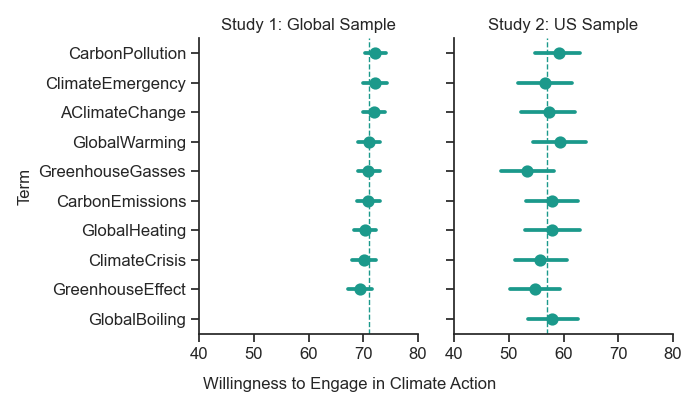

In [98]:
# Calculate the mean for each study
mean_value_df1 = df1['value'].mean()
mean_value_df2 = df2['Act'].mean()

# Setting the palette
pal = ["#1B998B"]

# Creating the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)  # Adjusted for two panels

# Sorting the terms based on mean willingness to act for df1
order_1 = df1.groupby("Term")['value'].mean().sort_values(ascending=False).index

# Add 'GlobalBoiling' to the order for Study 2 
if 'GlobalBoiling' not in order_1:
    order_2 = order_1.insert(len(order_1), 'GlobalBoiling')
else:
    order_2 = order_1

# Plot for Study 1
sns.pointplot(y="Term", x="value", data=df1, orient="h", color=pal[0], join=False, order=order_1, ax=ax[0])
ax[0].set_title("Study 1: Global Sample")
ax[0].set_ylabel("Term")

# Plot for Study 2
sns.pointplot(y="C", x="Act", data=df2, orient="h", color=pal[0], join=False, order=order_2, ax=ax[1])
ax[1].set_title("Study 2: US Sample")
ax[1].set_ylabel("")

# Set the x-axis scale for both plots
ax[0].set_xlim(40, 80)
ax[1].set_xlim(40, 80)

# Remove the individual x-labels
ax[0].set_xlabel("")
ax[1].set_xlabel("")

# Set a common x-label for the entire figure
fig.text(0.5, 0.04, 'Willingness to Engage in Climate Action', ha='center', va='center')

# Add vertical dotted line at the mean value for Study 1
ax[0].axvline(mean_value_df1, color='#1B998B', linestyle='--', linewidth=1)

# Add vertical dotted line at the mean value for Study 2
ax[1].axvline(mean_value_df2, color='#1B998B', linestyle='--', linewidth=1)

sns.despine()
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
plt.savefig('Terms_MainFig.png', dpi=900, format="png")

## NOT IN MANUSCRIPT-- test for between country differences

In [99]:
%R library(dplyr)
%R library(ggplot2)


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



array(['ggplot2', 'dplyr', 'car', 'carData', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], dtype='<U9')

In [100]:
%%R
summary_df <- df_main %>%
  group_by(Country, Term) %>%
  summarise(AverageWillingness = mean(value, na.rm = TRUE)) %>%
  arrange(Country, desc(AverageWillingness))

`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


In [101]:
%%R
anova_results <- aov(value ~ Term + Country, data = df_main)
summary(anova_results)

              Df  Sum Sq Mean Sq F value Pr(>F)    
Term           8    3819     477   0.923  0.496    
Country       62  277335    4473   8.647 <2e-16 ***
Residuals   4460 2307204     517                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [102]:
%%R
tukey_test <- TukeyHSD(anova_results, "Term")
print(tukey_test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Term + Country, data = df_main)

$Term
                                           diff       lwr      upr     p adj
Carbon_Emissions-AClimate_Change    -1.10525465 -5.528631 3.318122 0.9975058
Carbon_Pollution-AClimate_Change     0.23225237 -4.051709 4.516213 1.0000000
Climate_Crisis-AClimate_Change      -1.79339356 -6.241147 2.654360 0.9448437
Climate_Emergency-AClimate_Change    0.21380821 -4.176872 4.604489 1.0000000
Global_Heating-AClimate_Change      -1.61865672 -5.995808 2.758495 0.9668089
Global_Warming-AClimate_Change      -0.98901245 -5.363937 3.385912 0.9987798
Greenhouse_Effect-AClimate_Change   -2.66876958 -7.200890 1.863351 0.6638741
Greenhouse_Gasses-AClimate_Change   -1.06752890 -5.387111 3.252053 0.9976920
Carbon_Pollution-Carbon_Emissions    1.33750703 -3.059046 5.734060 0.9903858
Climate_Crisis-Carbon_Emissions     -0.68813890 -5.244438 3.868161 0.9999398
Climate_Eme